**Название проекта:** сводный проект, посвященный компьютерным играм для игровых платформ в период до 2016 г. 

**Заказчик:** исследование проводится для интернет-магазина «Стримчик», который продаёт компьютерные игры по всему миру

**Цель исследования:** выявить определяющие успешность компьютерной игры закономерности для определения потенциально популярного продукта и планирования рекламных кампаний интернет-магазином.
        
**Суть исследования:** Провести анализ данных при помощи которых интернет-магазин сможет прогнозировать потенциально популярные продукты в 2017 г. и планировать рекламный кампании

**Задачи исследования:** обработка данных, исследовательский анализ данных, составление портрета пользователя каждого региона, проверка гипотез, формулирование финальных выводов и рекомендаций

**Исходные данные:** исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы  из открытых источников. Данные представлены до 2016 г. (включительно - частично) 
        
        

Данное исследование разделено на несколько частей.

    
***Часть 1. Подготовка данных:***
* Изучение файлов с данными, получение общей информации, загрузка библиотек.
* Нахождение, обработка и ликвидация пропусков.
* Приведение данных к нужным типам
* Нахождение и исправление аномалий и ошибок    

***Часть 2. Анализ данных:***
* Анализ количества игр по годам
* Определение платформ-лидеров
* Срок жизненного цикла игровой платформы
* Выбор актуального периода данных для анализа
* Отбор потенциальных платформ-лидеров для 2017 г.
* График "ящик с усами" по продажам
* Влияние на продажи отзывов критиков и игроков
* Общее распределение игр по жанрам
    
    
***Часть 3. Портрет пользователей крупнейших регионов:***
* Игроки в Японии
* Игроки в Северной Америке
* Игроки в Европе

***Часть 4. Гипотезы:***
* Постановка и проверка гипотез
    
***Часть 5. Общий вывод и рекомендации***
       
</div>

# 1. Подготовка данных

Задачи: заменить названия столбцов, преобразовать данные при необходимости. Обработать пропуски. Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

In [1]:
import pandas as pd  
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st 

In [2]:
try:
    df = pd.read_csv('games.csv')  # загружаем локальный файл с данными
except:
    df = pd.read_csv('/datasets/games.csv')   # альтернативный пусть к данным для работы с других устройств

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


После первичного анализа данных приступаем к обработке.

In [5]:
df.columns=df.columns.str.lower()  # приводим названия столбцов к snake_case

Смотрим есть ли пропущенные значения в датасете.

In [6]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

##  Обработка пропусков

Пропуски есть в колонках  name, year_of_release, а также всех оценках и рейтингах. Данные в столбцах имя и год релиза являются критичными для анализа, пропусков немного, поэтому их убираем. Пропуски в баллах и рейтингах пока оставляем и дополнительно проанализируем позже, т.к. их наличие может быть обусловлено новизной игры (не успела получить оценку) и т.п.

Пропуски наблюдаются в 5 столбцах. Все пропуски можно разделить на два вида - объемные и нет. 
    
Не объемные: данные в столбцах "имя", "жанр" и "год релиза" представляются критичными для анализа и их объем невелик (2, 2 и 269 записей соответственно). Две строчки с пропущенными данными по имени и жанру выпущены в 1993 году, у них отсутствует информация практически во всем полям кроме продаж (невысоких). Эти данные не пригодятся нам для дальнейшего анализа и их можно исключить. 

Более детальный анализ пропусков по году релиза показал что медианные продажи у них минимальны по всем рынкам. Использовать их в дальнейшем анализе не представляется возможным, т.к. для достижения целей исследования нам необходимо будет определить по дате релиза игр актуальный период, за который мы будем исследовать данные. 
    
Дополнительный анализ (код ниже) пустых строк с датой релиза показал что их медианные продажи невысоки, но есть выбросы в виде популярных игр на рынках Северной Америки и Европы. Посмотрим их детально: дата релиза Madden NFL 2004 - 2004 год, Space Invaders - 1980,  Frogger's Adventures: Temple of the Frog - 2001, FIFA Soccer 2004 - 2004, wwe Smackdown vs. Raw 2006 - 2006, LEGO Batman: The Videogame - 2008, Call of Duty 3 - 2006.
Все эти данные не могут быть использованы для целей нашего исследования, т.к. не являются актуальными.


In [7]:
df.query('name.isna()')  # на всякий случай смотрим две записи с отсутствующим названием игры

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Полезной информации из этих записей не вытащить, удаляем. Аналогично поступаем с отсутствующим годом релиза.

In [8]:
#  смотрим цифровое описание данных с отсуствующим годом релиза:

df.query('year_of_release.isna()').describe()  

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,0.0,269.000000,269.000000,269.000000,269.000000,154.000000
mean,NaN,0.219888,0.090929,0.024907,0.032007,67.584416
std,NaN,0.424907,0.207933,0.090160,0.075546,14.828740
min,NaN,0.000000,0.000000,0.000000,0.000000,22.000000
25%,NaN,0.010000,0.000000,0.000000,0.000000,57.000000
50%,NaN,0.090000,0.020000,0.000000,0.010000,70.000000
75%,NaN,0.240000,0.100000,0.000000,0.030000,78.000000
max,NaN,4.260000,2.360000,0.770000,0.710000,94.000000


In [9]:
# смотрим есть игр без года релиза игры с большими продажами в Северной Америке

df.query('year_of_release.isna()').sort_values(by = 'na_sales', ascending = False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+


In [10]:
# смотрим есть игр без года релиза игры с большими продажами в Европе

df.query('year_of_release.isna()').sort_values(by = 'eu_sales', ascending = False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
1131,Call of Duty: Black Ops,PC,NaN,Shooter,0.58,0.81,0.00,0.23,81.0,5.2,M


In [11]:
df = df.dropna(subset=['name'])  # удаляем данные с пропусками в названии

In [12]:
df = df.dropna(subset=['year_of_release'])  # удаляем данные с пропусками в годе выпуска

Объемные: больше всего пропусков в данных об оценках критиков. Это объяснимо: не все игры привлекают внимание критиков и получают рецензии, плюс возможно это связано с разбивкой по годам. 
    
Посмотрим данные поподробнее (код ниже): пропуски в оценках распределены равномерно по всем годам и в большинстве своем оценка критиков отсутствует у игр с невысокими продажами. Аналогичное распределение наблюдается и с отсутствующими оценками игроков: оценок нет преимущественно у не очень популярных игр. Удалось выделить несколько игр с большими продажами и отсутствующими рейтингами, так, в например игра Call of Duty: Black Ops 3 выпущена в 2015 году и была бы интересна для нашего анализа. Отсутствие информации у таких игр связано предположительно с техническими проблемами выгрузки (данные не подтянулись). Заполнить их вручную не представляется возможным, т.к. в датафрейме отсутствует информация о источнике оценок критиков. Принимаем решение не трогать пропуски в оценках критиков и игроков, т.к. в подавляющем большинстве случаев их отсутствие означает, что игра не привлекла их внимание и не получила достаточного количества рецензий.
    
Отсутствие информации в рейтинге ESRB по регионам объясняется тем, что это американский рейтинг и лучше всего заполняется в Северной Америке, т.к. разработан именно для этого региона. Для отсутствующих данных поставим ниже "заглушку", чтобы использовать эти данные для дальнейшего анализа.
    </div>

In [13]:
# группируем данные без оценки критиков по годам и смотрим распределение

df.query('critic_score.isna()').groupby('year_of_release').count()\
.sort_values(by ='year_of_release', ascending = False)

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
year_of_release,,,,,,,,,,
2016.0,270,270,270,270,270,270,270,0,64,63
2015.0,381,381,381,381,381,381,381,0,112,103
2014.0,320,320,320,320,320,320,320,0,90,87
2013.0,271,271,271,271,271,271,271,0,46,49
2012.0,332,332,332,332,332,332,332,0,42,42
2011.0,636,636,636,636,636,636,636,0,220,215
2010.0,755,755,755,755,755,755,755,0,300,302
2009.0,775,775,775,775,775,775,775,0,371,366
2008.0,712,712,712,712,712,712,712,0,276,271


In [14]:
# группируем данные без оценки критиков по продажам в Северной Америке и смотрим распределение
df.query('critic_score.isna()').groupby('na_sales').count()\
.sort_values(by ='na_sales', ascending = False)

,name,platform,year_of_release,genre,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
na_sales,,,,,,,,,,
29.08,1,1,1,1,1,1,1,0,0,0
26.93,1,1,1,1,1,1,1,0,0,0
23.20,1,1,1,1,1,1,1,0,0,0
12.78,1,1,1,1,1,1,1,0,0,0
11.27,1,1,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
0.04,240,240,240,240,240,240,240,0,94,95
0.03,248,248,248,248,248,248,248,0,98,99
0.02,272,272,272,272,272,272,272,0,108,106


In [15]:
# группируем данные без оценки игроков по годам и смотрим распределение

df.query('user_score.isna()').groupby('year_of_release').count()\
.sort_values(by = 'year_of_release', ascending = False)

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
year_of_release,,,,,,,,,,
2016.0,206,206,206,206,206,206,206,0,0,4
2015.0,271,271,271,271,271,271,271,2,0,2
2014.0,231,231,231,231,231,231,231,1,0,2
2013.0,225,225,225,225,225,225,225,0,0,3
2012.0,290,290,290,290,290,290,290,0,0,3
2011.0,418,418,418,418,418,418,418,2,0,8
2010.0,457,457,457,457,457,457,457,2,0,9
2009.0,407,407,407,407,407,407,407,3,0,3
2008.0,440,440,440,440,440,440,440,4,0,3


In [16]:
# группируем данные без оценки игроков по продажам в Северной Америке и смотрим распределение

df.query('user_score.isna()').groupby('na_sales').count()\
.sort_values(by ='na_sales', ascending = False)

,name,platform,year_of_release,genre,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
na_sales,,,,,,,,,,
29.08,1,1,1,1,1,1,1,0,0,0
26.93,1,1,1,1,1,1,1,0,0,0
23.20,1,1,1,1,1,1,1,0,0,0
12.78,1,1,1,1,1,1,1,0,0,0
11.27,1,1,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
0.04,146,146,146,146,146,146,146,0,0,1
0.03,150,150,150,150,150,150,150,0,0,1
0.02,165,165,165,165,165,165,165,1,0,6


In [17]:
# 
df.query('user_score.isna()').sort_values(by ='na_sales', ascending = False).head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
89,Pac-Man,2600,1982.0,Puzzle,7.28,0.45,0.00,0.08,NaN,NaN,NaN


In [18]:
df.info()  # проверяем датасет на предмет изменившигося количества записей

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


После удаления пропущенных данных можно изменить формат данных года выпуска на int вместо float64 для удобства дальнейшей работы.  
Оценку пользователя меняем на float64,как и другие оценки, тк они содержат десятые.

In [19]:
df['year_of_release']=df['year_of_release'].astype('int') # меняем тип данный на int

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [21]:
#df['user_score']=df['user_score'].astype('float64')   

После попытки изменить тип данных в user_score на float64 получаем сообщение, что это невозможно, т.к. данные содержат не только пропуски, но и текстовое значение 'tbd'. Проверяем что это значит: "TBA and TBD" mean “to be announced” and “to be determined.”  На момент выгрузки данные отсутствовали (ожидались быть полученными). Таким образом значения tbd  можно заменить на отсутствие информации 

In [22]:
df.loc[df['user_score'] == 'tbd', 'user_score'].count()  # смотрим количество таких записей

2376

In [23]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)  # меняем на пустые
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [24]:
df.loc[df['user_score'] == 'tbd', 'user_score'].count()  # проверяем что таких записей больше нет

0

In [25]:
df['user_score']=df['user_score'].astype('float64')  # меняем тип данных на float64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [27]:
df['rating'].value_counts(dropna = False)  # смотрим какие значения содержит колонка rating 

NaN     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Значения текстовые, тип объекта менять не надо. В рассматриваемых данных содержится рейтинг от организации ESRB-  подходящая возрастная категория для игры. «E» («Everyone») и "K-A" ("Kids to Adults") - идентичные рейтинги, K-A более старый. Их можно объединить. Остальные небольшие категории имеют свои уникальные значения - EC - «Early childhood», для детей от 3 лет. AO - "Adults only". Рейтинг RP означает «Rating Pending» - данные ожидаются, на момент выгрузки они отсутствовали - этот рейтинг можно заменить на отсутствующий.

In [28]:
df['rating'] = df['rating'].str.replace("K-A", "E")
df ['rating']= df['rating'].replace('RP', np.nan)
df['rating'].value_counts() 

E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
Name: rating, dtype: int64

У большого количества игр рейтинг не указан, отметим это отдельно,чтобы возможно использовать в дальнейшем для анализа.

In [29]:
df['rating']=df['rating'].fillna(value='without')  # заменяем пропуски в поле rating на инфу о том, что рейтинг отсутствует

Проверяем датасет на явные дубликаты:

In [30]:
df.duplicated().sum()  #  проверяем на дубликаты

0

In [31]:
# ищем неявные дубликаты по сочетанию Название и Платформа

df.duplicated(subset= ['name', 'platform']).sum()

3

In [32]:
# смотрим на неявные дубликаты 

df[df.duplicated(subset= ['name', 'platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


Неявных дубликатов всего 3 на весь датафрейм. Принимаем решение их не удалять, т.к. речь может идти о перевыпуске игры на платформе и не являться ошибкой.

В соответствии с задачами исследования создаем новый столбец данных с суммарными данными продаж во всех регионах:

In [33]:
df['all_sales'] = df['na_sales'] +df['eu_sales'] + df['jp_sales'] + df['other_sales']

Завершающий взгляд на уже обработанные данные, смотрим на предмет выбросов, аномалий, средних значений.

In [34]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


Наблюдаются выбросы в максимальных значениях продаж, что логично, т.к. есть игры-лидеры с большим количеством реализованных копий. Оценка критиков дается по 100-балльной оценке, пользователей - по 10-балльной. Обращает на себя внимание медиана 0 на японском рынке - посмотрим это дальше поподробнее.


Вывод: первичная подготовка данных завершена. Записи с отсутствующими критичными данными удалены, остальные приведены к удобному для анализа виду. Проверка на дубликаты проведена. Добавлен новый столбец с суммарными данными продаж во всем мире.

# 2. Исследовательский анализ данных

Задачи: проанализировать выпуск игр в историческом разрезе, выбрать платформы-лидеры и построить распределение по годам. Определить срок жизни платформы, определить актуальный период для дальнейшего прогноза на 2017 г. Определить потенциальные платформы-лидеры, построить boxplot, посмотреть корреляцию между продажами и отзывами игроков и критиков. Проанализировать популярные жанры игр.

### Игры в разрезе по годам релиза

In [35]:
df.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

In [36]:
# смотрим сколько всего названий игр в датафрейме

df['name'].count()

16444

In [37]:
# считаем только первое сочетание игра + год релиза

df[df.duplicated(subset= ['name', 'year_of_release'], keep='first')]['name'].count()

4249

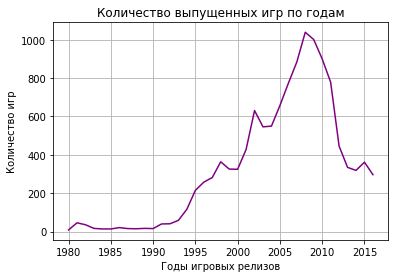

In [38]:
# рисуем аналогичный график по данным датасета без дублей на других платформах

(df[~df.duplicated(subset= ['name', 'year_of_release'], keep='first')]\
    .groupby('year_of_release')['name'] 
    .count()  # группируем данные по количеству релизов игр по годам 
    .plot(kind = 'line', grid = True,  color = 'purple', xlabel = 'Годы игровых релизов', \
    ylabel = "Количество игр", \
    title = 'Количество выпущенных игр по годам')  # визуализируем линейным графиком
)
plt.show()


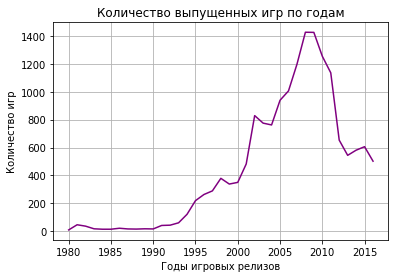

In [39]:
(df
    .groupby('year_of_release')['name']  
    .count()  # группируем данные по количеству релизов игр по годам 
    .plot(kind = 'line', grid = True,  color = 'purple', \
          xlabel = 'Годы игровых релизов', ylabel = "Количество игр", \
    title = 'Количество выпущенных игр по годам')  # визуализируем линейным графиком
)
plt.show()

Количество уникальных игр заметно уменьшилось, но сами графики практически идентичны, исключая подписи на оси y. Судя по этому все игры выпускают на примерно одинаковом числе платформ. Основной тренд тот же - пик количества релизов в 2006-2009 гг. и последующий спад.

Явный всплеск роста выпускаемых компьютерных игр начался в 90-ые годы, с пиком популярности в нулевых - между 2005 и 2010 гг. и последующим спадом. Нас интересует прогноз на 2017 год, поэтому в столь активно изменяющейся отрасли для нас наибольший интерес представляют данные за последние 4 года максимум. Точнее определение периода можно будет сделать после полного анализа, а пока отсекаем данные ранее 1990 года - они не представляют никакого интереса, т.к. это были другие технологии и виды игр.

По оценкам экспертов именно в период после 2009 года сильно вырос уровень графических карт для ПК. Таким образом консольные игры перестали заметно выделяться за счет своей "картинки", а пользователь стал все чаще выбирать игры для ПК. Решением для рынка игровых платформ стала ориентация на качество вместо количества - для консолей все чаще стали выпускать "эксклюзивные" и "особые" версии игр, что должно было привлечь ценителей. Таким образом общее количество выпускаемых игр сильно сократилось.

In [40]:
df = df.query('year_of_release >= 1990')  # присваиваем датафрейму срез без данных раньше 1990 гг.
df.info()  # проверяем что данные изменились не сильно

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16239 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16239 non-null  object 
 1   platform         16239 non-null  object 
 2   year_of_release  16239 non-null  int64  
 3   genre            16239 non-null  object 
 4   na_sales         16239 non-null  float64
 5   eu_sales         16239 non-null  float64
 6   jp_sales         16239 non-null  float64
 7   other_sales      16239 non-null  float64
 8   critic_score     7981 non-null   float64
 9   user_score       7461 non-null   float64
 10  rating           16239 non-null  object 
 11  all_sales        16239 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Платформы-лидеры

Рассмотрим изменение продаж по платформам. Для начала определим самые успешные платформы за весь период с 1990 г.:

In [41]:
# формируем сводную таблицу по платформам, сортируем общие продажи по убыванию

df.pivot_table(index = "platform", values = 'all_sales', aggfunc = 'sum')\
.sort_values(by = 'all_sales', ascending = False)  

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


PS2 заработала больше всех денег за весь период с 1990 гг, за ней X360 и PS3.Посмотрим изменились ли лидеры после 2000 года.

In [42]:
# формируем сводную таблицу по платформам на срезе релизов после 2000 г., сортируем общие продажи по убыванию
df.query('year_of_release >= 2000').pivot_table(index = "platform", values = 'all_sales', \
aggfunc = 'sum').sort_values(by = 'all_sales', ascending = False)

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS4,314.14
GBA,312.88
PSP,289.53
3DS,257.81


Список лидеров не изменилось, что логично, ведь согласно данным по количеству выпущенных компьютерных игр именно в 2000-ые (с 2006 по 2009 гг.) их выпускалось больше всего. Основные продажи тоже совершались в этот период, а не в 90ые годы.
Однако индустрия не стоит на месте, выпускаются новые платформы, дорабатываются игры и усложняются технические характеристики. Посмотрим на платформы-лидеры, продавшие более 100 млн копий за период с 2000 года.

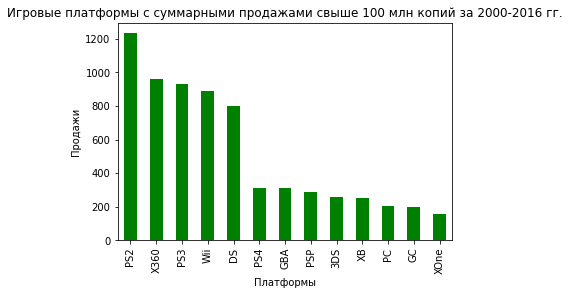

In [43]:
(df
    .query('year_of_release >= 2000')
    .pivot_table(index = "platform", values = 'all_sales', aggfunc = 'sum')
    .sort_values(by = 'all_sales', ascending = False)
    .head(13)
    .plot(kind = 'bar', color = 'green', \
          title = 'Игровые платформы с суммарными продажами свыше 100 млн копий за 2000-2016 гг.', \
          xlabel = "Платформы", ylabel = "Продажи", legend = False)  # строим barplot 
)
plt.show()

In [44]:
#  выделяем в лидеры 10 платформ с продажами свыше 250 млн.

top_platform = df.query('year_of_release >= 2000')\
.pivot_table(index = "platform", values = 'all_sales', aggfunc = 'sum')\
.sort_values(by = 'all_sales', ascending = False).head(10)  

In [45]:
top_platform

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS4,314.14
GBA,312.88
PSP,289.53
3DS,257.81


In [46]:
top_platform = top_platform.reset_index()  # сбрасываем индексы 
top_platform_list = top_platform['platform']  # названия платформ сохраняем в список top_platform_list

Построим распределение по годам продаж платформ с наибольшими суммарными продажами. Индустрия не стоит на месте, платформы и игры дорабатываются, изменяются технические требования. Платформы устаревают и продажи переходят к более новым моделям. Посмотрим на графике какая приблизительная продолжительность жизненного цикла платформы. 

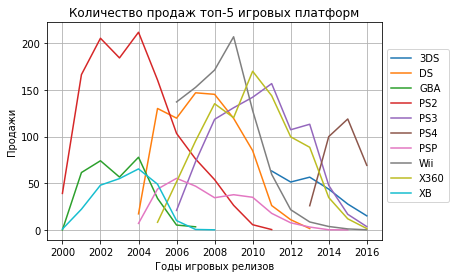

In [47]:
df.query('platform in @top_platform_list')\
    .pivot_table(index = 'year_of_release', columns = 'platform', values = 'all_sales', \
    aggfunc = 'sum')\
    .plot(kind = 'line', grid = True,  xlabel = 'Годы игровых релизов', \
     ylabel = "Продажи",  title = 'Количество продаж топ-5 игровых платформ')\
    .legend(bbox_to_anchor=(1, 0.9), title = '', fontsize=10)
plt.show()


### Срок жизненного цикла игровой платформы

Средний срок жизни успешной платформы - приблизительно от 6 до 10 лет. Посмотрим эти данные более детально.

In [48]:
# посмотрим распределение максимальных и минимальных значений

df.query('year_of_release >= 2000 and platform in @top_platform_list')\
.groupby('platform')['year_of_release'].describe()  

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,512.0,2013.126953,1.647359,2011.0,2012.0,2013.0,2015.0,2016.0
DS,2120.0,2008.196226,1.706160,2004.0,2007.0,2008.0,2009.0,2013.0
GBA,811.0,2003.210851,1.474451,2000.0,2002.0,2003.0,2004.0,2007.0
PS2,2127.0,2004.583921,2.567689,2000.0,2002.0,2005.0,2007.0,2011.0
PS3,1306.0,2010.840735,2.459616,2006.0,2009.0,2011.0,2013.0,2016.0
PS4,392.0,2015.145408,0.868181,2013.0,2015.0,2015.0,2016.0,2016.0
PSP,1193.0,2008.731769,2.434057,2004.0,2006.0,2009.0,2011.0,2015.0
Wii,1286.0,2008.966563,1.542034,2006.0,2008.0,2009.0,2010.0,2016.0
X360,1232.0,2009.880682,2.458339,2005.0,2008.0,2010.0,2011.0,2016.0


In [49]:
# посмотрим сколько существовали платформы - вычитаем из max значения  min 

(df.query('year_of_release >= 2000 and platform in @top_platform_list')\
 .groupby('platform')['year_of_release'].max() - \
 df.query('year_of_release >= 2000 and platform in @top_platform_list')\
 .groupby('platform')['year_of_release'].min())\
.sort_values(ascending = False)  

platform
PS2     11
PSP     11
X360    11
PS3     10
Wii     10
DS       9
XB       8
GBA      7
3DS      5
PS4      3
Name: year_of_release, dtype: int64

In [50]:
# найдем среднюю продолжительность жизни платформ - лидеров

(df.query('year_of_release >= 2000 and platform in @top_platform_list')\
 .groupby('platform')['year_of_release'].max() - \
 df.query('year_of_release >= 2000 and platform in @top_platform_list')\
 .groupby('platform')['year_of_release'].min())\
.sort_values(ascending = False).mean()  

8.5

In [51]:
# и медианную
(df.query('year_of_release >= 2000 and platform in @top_platform_list')\
 .groupby('platform')['year_of_release'].max() - \
 df.query('year_of_release >= 2000 and platform in @top_platform_list')\
 .groupby('platform')['year_of_release'].min())\
.sort_values(ascending = False).median() 

9.5

Говоря о продолжительности жизненного цикла популярных платформ за период с 2000 г. можно говорить о том, что они востребованы чуть менее 10 лет. Однако как видно из графика начальный и финальный этапы жизненного цикла не сопровождаются большими финансовыми успехами, поэтому если мы говорим о максимальной финансовой эффективности платформы-лидера, то можно ориентироваться на период около 6 лет.

### Определение актуального период данных для прогноза на 2017 год

Для дальнейшего анализа данных и прогноза на 2017 год представляется эффективным рассмотреть данные за последние 4 года - с 2013 по 2016 года. Это около половины от среднего срока жизненного цикла платформ и максимальный срок, который можно использовать для прогноза на 2017 г. 

In [52]:
df_actual = df.query('year_of_release >=2013')
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  all_sales        2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


Для анализа осталось приблизительно 14% от всей исходной базы, что неудивительно, если вспомнить, что основной пик выпуска игр пришелся на нулевые года. Для определения тенденций индустрии и прогноза на следующий год можно было бы ограничиться и 2-3 последними годами, но именно в силу небольшого объема полученного среза остановимся на 4 годах.

### Платформы-лидеры: выбор потенциально прибыльных платформ.


In [53]:
# определяем платформ-лидеров по продажам за актуальный период

top_platform_actual = df_actual\
    .pivot_table(index = "platform", values = 'all_sales', aggfunc = 'sum')\
    .sort_values(by = 'all_sales', ascending = False).head(5)   

In [54]:
top_platform_actual = top_platform_actual.reset_index() # сбрасываем индексы
top_platform_actual_list = top_platform_actual['platform']  # передаем список с названиями
top_platform_actual_list

0     PS4
1     PS3
2    XOne
3     3DS
4    X360
Name: platform, dtype: object

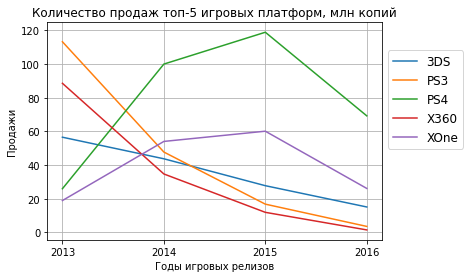

In [55]:
#строим график по срезу платформы в списке top_platform

df_actual.query('platform in @top_platform_actual_list')\
    .pivot_table(index = 'year_of_release', columns = 'platform', values = 'all_sales',\
     aggfunc = 'sum')\
    .plot(kind = 'line', grid = True, xlabel = 'Годы игровых релизов', ylabel = "Продажи", \
    title = 'Количество продаж топ-5 игровых платформ, млн копий')\
    .legend(bbox_to_anchor=(1, 0.9), title = '', fontsize=12)
plt.xticks([2013, 2014,2015, 2016])
plt.show()


Исходя из полученных данных за актуальных период наибольший интерес в 2017 г. для нас представляют следующие игровые платформы: Плейстешн 4 (PS4), Нинтендо 3D (3DS) и  Xbox One (X-One). Все они относятся к лидерам восьмого поколения игровых приставок, которое стартовало в 2011 г. и будет по-прежнему актуально в 2017 г. 
Если оценивать по медианному жизненному циклу платформ-лидеров, то данные приставки будут актуальны как минимум до 2019 г.  (!upd из будущего: прогноз практически оправдался, релиз игровых приставок девятого поколения был осуществлен в ноябре 2020 г.)

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

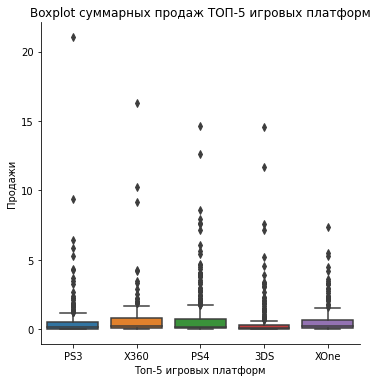

In [56]:
# строим boxplot с помощью библиотеки seaborn по срезу из отобранных платформ

sns.catplot(data = df_actual.query('platform in ["PS4", "PS3", "XOne", "3DS", "X360"]'),\
    x = 'platform', y = 'all_sales', kind = 'box' )\
    .set(title = 'Boxplot суммарных продаж ТОП-5 игровых платформ', xlabel = "Топ-5 игровых платформ", \
    ylabel = "Продажи") 
plt.show()

Как уже отмечалось раньше - данные содержат выбросы в силу того, что есть очень популярные игры - лидеры по продажам, чьи показатели сильно выбиваются. Введем лимит по оси y, чтобы подробнее рассмотреть медиану и квартили.

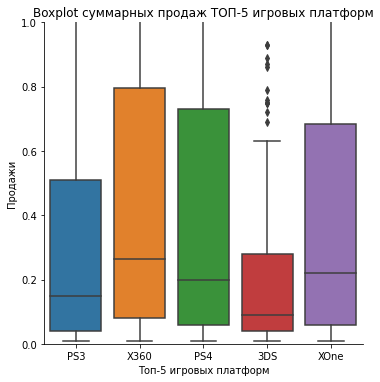

In [57]:
sns.catplot(data = df_actual.query('platform in ["PS4", "PS3", "XOne", "3DS", "X360"]'), \
    x = 'platform', y = 'all_sales', kind = 'box' )\
    .set(title = 'Boxplot суммарных продаж ТОП-5 игровых платформ', xlabel = "Топ-5 игровых платформ",\
    ylabel = "Продажи") 

plt.ylim(0, 1)  # вводим ограничение по оси y, чтобы поближе посмотреть на медиану
plt.show()

Самые высокие медианные продажи у консоли Xbox 360 (X360) - свыше 300 тыс. копий. Плейстешн 3 и 4 и Xbox One примерно около 200 тыс. копий и Нинтендо 3D - чуть больше 100 тыс. копий. 

### Влияние на продажи отзывов пользователей и критиков. 

Посмотрим на взаимосвязь продаж и оценок критиков и пользователей на примере одной из 3 наших потенциально выгодных платформ - PS4

In [58]:
# формируем сводную таблицу по названию игры, оценки критиков, оценки игроков. 
# сортируем по продажам и смотрим первые 5 строк

(df_actual
    .query('platform == "PS4"')  # делаем срез по платформе PS4
    .pivot_table(index = ['name','critic_score','user_score'], values = 'all_sales', aggfunc = 'sum')
    .sort_values(by = 'all_sales', ascending = False)
    .head()  
)

,,,all_sales
name,critic_score,user_score,
Grand Theft Auto V,97.0,8.3,12.62
FIFA 16,82.0,4.3,8.58
Call of Duty: Advanced Warfare,83.0,5.7,7.66
FIFA 17,85.0,5.0,7.60
Fallout 4,87.0,6.5,7.17


In [59]:
# формируем сводную таблицу по названию игры, оценки критиков, оценки игроков. Смотрим последние 5 строк

(df_actual
    .query('platform == "PS4"')  # делаем срез по платформе PS4
    .pivot_table(index = ['name','critic_score','user_score'], values = 'all_sales', aggfunc = 'sum')
    .sort_values(by = 'all_sales', ascending = False)
    .tail()     
) 

,,,all_sales
name,critic_score,user_score,
Sherlock Holmes: The Devil's Daughter,70.0,6.8,0.01
Dungeons 2,61.0,7.9,0.01
Super Dungeon Bros,42.0,2.3,0.01
Super Stardust Ultra VR,66.0,6.2,0.01
Mark McMorris Infinite Air,49.0,6.0,0.01


Высокие оценки есть как у популярных игр, так и совсем нет, как и низкие. Рассмотрим корреляции продаж и критики более детально: с помощью диаграммы рассеяния и расчетом кореляции:

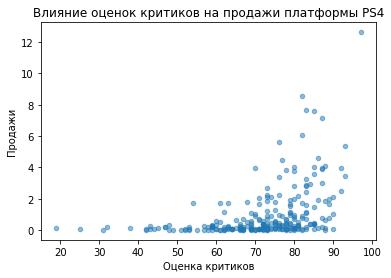

Корреляция между оценками критиков и продажами платформы PS4:


0.406567902061781

In [60]:
# рисуем диаграмму рассеяния

df_actual.query('platform == "PS4"').plot(x='critic_score', y='all_sales', kind='scatter', \
alpha= 0.5, title = "Влияние оценок критиков на продажи платформы PS4", xlabel = 'Оценка критиков', \
ylabel = 'Продажи' )
plt.show()
# и рассчитываем корреляцию между оценками критиков и продажами
print('Корреляция между оценками критиков и продажами платформы PS4:')  
df_actual.query('platform == "PS4"')['all_sales'].corr(df_actual.query('platform == "PS4"')\
['critic_score'])

Взаимосвязь продаж и оценок критиков наблюдается незначительная: 0,4. По диаграмме видно что в целом есть тенденция бОльших продаж у тех игр, которые набрали хотя бы 50-60 баллов у критиков.

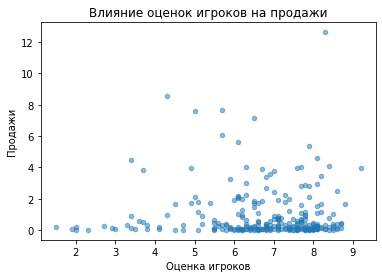

Корреляция между оценками игроков и продажами платформы PS4:


-0.031957110204556376

In [61]:
# рисуем диаграмму рассеяния между продажами и оценками игроков

df_actual.query('platform == "PS4"').plot(x='user_score', y='all_sales', kind='scatter', \
alpha= 0.5, title = "Влияние оценок игроков на продажи", xlabel = 'Оценка игроков', ylabel = 'Продажи')
plt.show()  

# и считаем корреляцию

print('Корреляция между оценками игроков и продажами платформы PS4:')  
df_actual.query('platform == "PS4"')['all_sales']\
.corr(df_actual.query('platform == "PS4"')['user_score'])

Корреляция отсутствует,даже наблюдается минимальное отклонение в отрицательные значения. Рейтинг игр среди пользователей корреляции с продажами не имеет.

Cоотнесем выводы с продажами игр на других платформам - возьмем оставшие 2 из наших трех, определенных ранее как перспективные. 

Взаимосвязь оценок игроков и продаж:

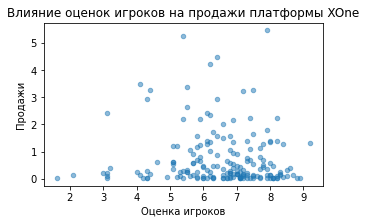

Корреляция между оценками игроков и продажами платформы XOne -0.06892505328279412


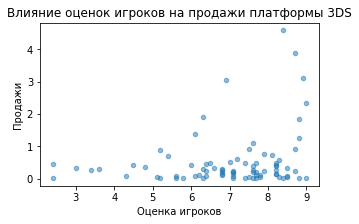

Корреляция между оценками игроков и продажами платформы 3DS 0.24150411773563016


In [62]:
for platform in ["XOne", "3DS"]:  #  запускаем цикл для перебора названия платформ
    score = df_actual.query('platform == @platform')  # заносим срез массива по платформе в переменную
    
    # рисуем диаграмму и рассчитываем корреляцию:
    
    score.plot(x='user_score', y='all_sales', kind='scatter', alpha= 0.5, figsize=(5,3), \
    title = "Влияние оценок игроков на продажи платформы "+ platform, xlabel = 'Оценка игроков', \
    ylabel = 'Продажи'  )
    plt.show()
    print('Корреляция между оценками игроков и продажами платформы', platform, \
    score['all_sales'].corr(score['user_score']))


Явно выраженные корреляции отсутствуют, по диаграммам размаха видно что чуть чаще покупаются игры с оценками выше хотя бы 5-6 баллов. 

Рассмотрим взаимосвязь оценок критиков и продаж:

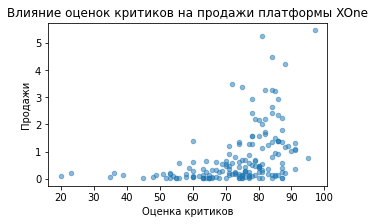

Корреляция между оценками критиков и продажами платформы XOne 0.41699832800840175


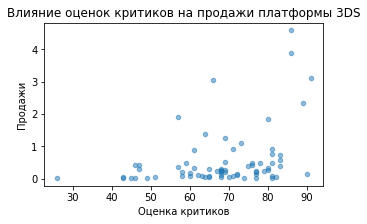

Корреляция между оценками критиков и продажами платформы 3DS 0.35705661422881035


In [63]:
for platform in ["XOne", "3DS"]: # повторно запускаем цикл - теперь для оценок критиков
    score = df_actual.query('platform == @platform')
    score.plot(x='critic_score', y='all_sales', kind='scatter', alpha= 0.5, figsize=(5,3), \
    title = "Влияние оценок критиков на продажи платформы "+ platform, xlabel = 'Оценка критиков', \
    ylabel = 'Продажи'  )
    plt.show()
    print('Корреляция между оценками критиков и продажами платформы', platform, \
    score['all_sales'].corr(score['critic_score']))

Небольшая кореляция с оценками критиков присутствует, однако она слишком незначительна для значимых выводов. Игры с оценкой выше 50-60 баллов покупаются чаще.

### Общее распределение игр по жанрам. 


In [64]:
# формируем сводную таблицу по жанру и считаем медианные продажи, сортируя по убыванию

top_genre = df_actual.pivot_table(index = 'genre', values = 'all_sales', aggfunc = 'median')\
.sort_values(by= 'all_sales', ascending = False)
top_genre = top_genre.reset_index()  # сбрасываем индексы
top_genre.columns=['genre', 'median_sales'] # переименовываем столбцы для наглядности данных
top_genre

,genre,median_sales
0,Shooter,0.450
1,Sports,0.240
2,Platform,0.225
3,Role-Playing,0.125
4,Fighting,0.125
5,Racing,0.120
6,Action,0.110
7,Simulation,0.100
8,Misc,0.100
9,Strategy,0.080


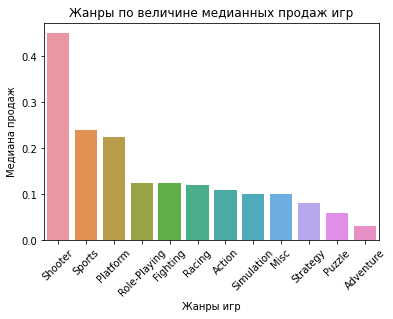

In [65]:
# строим график

sns.barplot(data=top_genre, x = 'genre', y= 'median_sales')\
.set(title = 'Жанры по величине медианных продаж игр', xlabel = 'Жанры игр', ylabel = "Медиана продаж" )
plt.xticks(rotation = 45) # поворачиваем подписи по оси X для удобного прочтения графика
plt.show()

Несмотря на то, что самое большое количество игр выпускается в жанре Action, самые высокие медианные продажи (с большим отрывом) наблюдаются в жанре Shooter. Среди лидеров в жанрах также Sports и Platform (подвид Action games, основной акцент игры на перемещения персонажа игрока между заданными точками).
    
Самые непопулярные жанры - пазллы и Adventure.



Вывод: исследовательский анализ данных позволил определить актуальный период для прогноза на 2017 г. как 2013-2016 гг., также выбраны 3 потенциальные платформы-лидера для 2017 года: Плестейшин 4, Xbox One и Нинтендо 3D. Определена небольшая положительная корреляция между оценками критиков и продажами, незначительная отрицательная - между оценками игроков и продажами. Выделены самые покупаемые жанры компьютерных игр: Shooter, Sports и Platform, и наименее востребованные - паззлы и Adventure.

# 3. Портрет пользователя крупнейших регионов

Задачи: определить портрет пользователя каждого представленного региона в разрезе предпочитаемых плаформ, жанров и рейтингов. Сравнить их между собой.

### Пользователи в Японии: основные характеристики

In [66]:
df_actual['jp_sales'].sum()  # считаем общий объем продаж копий игр на рынке Японии

140.78000000000003

In [67]:
df_actual['jp_sales'].median() # и медианное значение

0.01

Смотрим на общий рынок Японии - он не очень объемный, 140 млн копий. Проверяем медианное значение, которое привлекло внимание при первичной обработке данных - 10000 проданных копий. Отсортируем продажи по платформам, жанрам и рейтингам и посмотрим как они распределяются. 

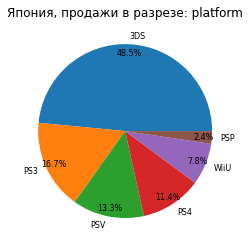

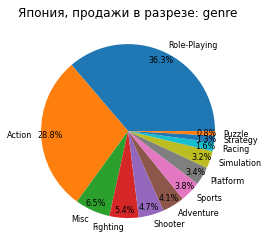

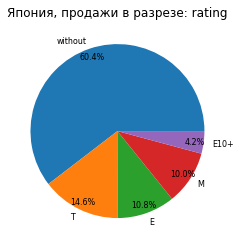

In [68]:
for i in ['platform', 'genre', 'rating']: # создаем цикл, который перибирает интересующие нас виды данных
    
    # группируем данные по региону, считаем общие продажи:
    jp_data = df_actual[df_actual['jp_sales'] > 0].groupby(i).agg({'jp_sales':'sum'})  
     # рассчитываем процентное соотношение продаж:
    jp_data['sales_proportion'] = jp_data['jp_sales']/df_actual['jp_sales'].sum()*100 
    jp_data = jp_data.sort_values(by = 'sales_proportion', ascending = False)  # сортируем
    jp_data.query('sales_proportion>0.5').plot(kind = 'pie', y = 'sales_proportion', \
    title = "Япония, продажи в разрезе: "+ i, \
    ylabel = '', legend = False, autopct='%1.1f%%', pctdistance=0.9, fontsize = 8)  # рисуем график 
plt.show()

Портрет пользователя из Японии: почти в половине случаев использует приставку Нинтендо 3D, либо Плейстешн разных версий. Играет чаще всего в role-playing (36%) или Action (29%) игры. Самые популярные рейтинги - T (подростки старше 13 лет), E (без ограничений) и M (mature - для взрослых), однако эти данные сложно назвать полными, т.к. у 60% игр рейтинг отсутствует.

### Пользователи в Северной Америке: основные характеристики

In [69]:
df_actual['na_sales'].sum()

437.71

Самый большой рынок продаж: почти в три раза превышает японский.

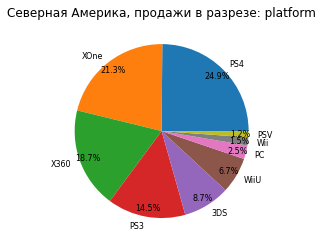

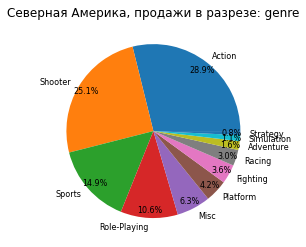

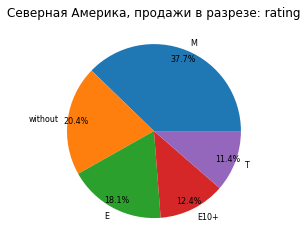

In [70]:
for i in ['platform', 'genre', 'rating']: # создаем цикл, который перибирает интересующие нас виды данных
    na_data = df_actual[df_actual['na_sales'] > 0].groupby(i).agg({'na_sales':'sum'})  
    # группируем данные по региону, считаем общие продажи
    na_data['sales_proportion'] = na_data['na_sales']/df_actual['na_sales'].sum()*100  
    # рассчитываем процентное соотношение продаж
    na_data = na_data.sort_values(by = 'sales_proportion', ascending = False)  # сортируем
    na_data.query('sales_proportion>0.5').plot(kind = 'pie', y = 'sales_proportion', \
    title = "Северная Америка, продажи в разрезе: "+ i, \
    ylabel = '', legend = False, autopct='%1.1f%%', pctdistance=0.9, fontsize = 8)  # рисуем график 
plt.show()

Портрет пользователя из Северной Америки: нет явных предпочтений по приставкам, чаще всего играет в Плейстейнш 4, Xbox One и 360. Чаще предпочитает жанры Action, Shooter и Sports. Почти половина всех проданных копий содержит рейтинг M ("для взрослых"). 

### Пользователи в Европе: основные характеристики

In [71]:
df_actual['eu_sales'].sum()

392.23

Почти 400 млн копий - меньше Северной Америки, но меньше чем на 100 млн. копий.

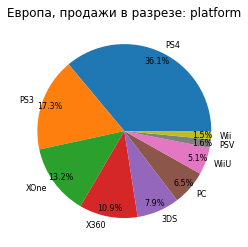

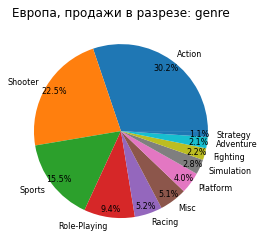

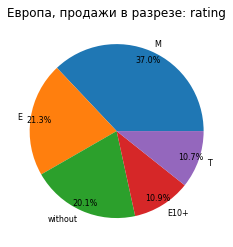

In [72]:
for i in ['platform', 'genre', 'rating']: # создаем цикл, который перибирает интересующие нас виды данных
    eu_data = df_actual[df_actual['eu_sales'] > 0].groupby(i).agg({'eu_sales':'sum'})  
    # группируем данные по региону, считаем общие продажи:
    eu_data['sales_proportion'] = eu_data['eu_sales']/df_actual['eu_sales'].sum()*100  
    # рассчитываем процентное соотношение продаж:
    eu_data = eu_data.sort_values(by = 'sales_proportion', ascending = False)  # сортируем
    eu_data.query('sales_proportion>0.5').plot(kind = 'pie', y = 'sales_proportion', \
    title = "Европа, продажи в разрезе: "+ i, \
    ylabel = '', legend = False, autopct='%1.1f%%', pctdistance=0.9, fontsize = 8)  # рисуем график 
plt.show()

Портрет пользователя из Европы: в половине случаев играет на консоли Плейстейшн (4, реже 3). Из жанров выбирает Action, Shooter и Sports. Чуть больше чем в трети случаев выбирает игры с рейтингом M - для взрослых, в 21№  - игры без возрастных ограничений,кроме того у 20% игр рейтинг не определен.

Вывод: предпочтения на японском рынке заметно отличаются от Северной Америки и Европы.  В Японии лидирует Нинтендо 3D, в Европе и Северной Америке – Плейстешн 4. В Америке и Европе предпочитают жанры action, shooting и sport, в Японии лидер role-playing.

Рейтинг ESRB по регионам: лучше всего заполняется в Северной Америке, т.к. разработан именно для этого региона. У 60% проанализированных игр на японском рынке он отсутствует. Из заполненных рейтингов наиболее популярны игры с рейтингом M («для взрослых») и игры без возрастных ограничений

# 4. Гипотезы

Задача: проверить 2 стратегические гипотезы

Проверяем стратегическую гипотезу "средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Формулируем нулевую гипотезу - "среднее рейтинга пользователя платформ Xbox One и PC равно". Альтернативная гипотеза в таком случае будет противоположным значением -  "среднее рейтинга пользователя платформ Xbox One и PC не равно". Уровень значимости принимаем 5%, чтобы быть более уверенным в результате.

In [73]:
# заносим в переменные данные для сравнения:

sample1 = df_actual.query('platform == "XOne" and user_score>=0 ')['user_score']  
sample2 =  df_actual.query('platform == "PC" and user_score>=0 ')['user_score']
alpha = .05   # устанавливаем уровень статистической значимости
results = st.ttest_ind(sample1, sample2, equal_var = False) # проверяем гипотезу
print ('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу опровергнуть не удалось, следовательно мы можем подтвердить, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы с вероятностью превышающей уровень значимости.

Проверяем стратегическую гипотезу "средние пользовательские рейтинги жанров Action и Sports разные". Формулируем нулевую гипотезу - "среднее рейтинга жанров Action и Sport равно". Альтернативная гипотеза будет "средние пользовательские рейтинги жанров Action и Sports разные". Уровень значимости принимаем 5%.


In [74]:
# заносим в переменные данные для сравнения:

sample3 = df_actual.query('genre == "Action" and user_score>=0 ')['user_score']  
sample4 =  df_actual.query('genre == "Sports" and user_score>=0 ')['user_score']
alpha = .05  # устанавливаем уровень статистической значимости
results = st.ttest_ind(sample3, sample4, equal_var = False)  # проверяем гипотезу
print ('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, следовательно принимаем альтернативную гипотезу - средние пользовательские рейтинги жанров Action и Sports разные.

Вывод: средние пользовательские рейтинги платформ Xbox One и PC одинаковы с вероятностью превышающей уровень значимости; средние пользовательские рейтинги жанров Action и Sports разные.

# 5. Общий вывод

В результате исследования для интернет-магазин «Стримчик» были проанализированы исторические данные о продажах игр до 2016 года включительно, оценки пользователей и экспертов, жанры и платформы (данные из открытых источников).

**Целью исследования** являлось выявить определяющие успешность консольной игры закономерности для определения потенциально популярного продукта и планирования рекламных кампаний.

Для реализации поставленной цели первичные данные были обработаны и проанализированы. 




***Основные буллиты проведенного анализа:***

* Явный всплеск роста количества выпускаемых консольных игр начался в 90-ые годы, с пиком популярности в нулевых - между 2005 и 2010 гг. и последующим спадом в силу все большей конкуренции с ПК. 

* Продолжительность жизненного цикла популярных платформ  составляет 8- 10 лет. 

* Для анализа и прогноза данных отобран период за последние 4 года - с 2013 по 2016 года.

* Наибольший интерес в 2017 г. представляют следующие игровые платформы: Плейстешн 4 (PS4), Нинтендо 3D (3DS) и  Xbox One (X-One), которые относятся к восьмому поколению игровых приставок, которое стартовало в 2011 г. и будет по-прежнему актуально в 2017 г. 

* Самые высокие медианные продажи у консоли Xbox 360 (X360) - свыше 300 тыс. копий. Плейстешн 3 и 4 и Xbox One примерно около 200 тыс. копий и Нинтендо 3D - чуть больше 100 тыс. копий. 

* Корреляция между продажами игр для популярных платформ и оценками критиков и игроков выражена незначительно (небольшая положительная с оценками критиков, незначительно отрицательная с оценками игроков). При прочих равных стоит ориентировать рекламные стратегии на работу прежде всего с критиками отрасли. Желательный балл – как минимум выше 50-60 баллов. Рейтингами игроков в рекламной стратегии можно пренебречь.

* Самые прибыльные жанры - Shooter, Sports и Platform Меньше всего играют в паззлы и приключения.

* Самый прибыльный рынок – Северная Америка, на втором месте Европа, на третьем Япония. 

* Платформы по регионам: в Японии лидирует Нинтендо 3D, в Европе и Северной Америке – Плейстешн 4.

* Жанры по регионам: в Америке и Европе предпочитают action, shooting и sport, в Японии - в role-playing.

* Рейтинг ESRB по регионам:  лучше всего заполняется в Северной Америке, т.к. разработан именно для этого региона. У 60% проанализированных игр на японском рынке он отсутствует. Из заполненных рейтингов наиболее популярны игры с рейтингом M («для взрослых») и игры без возрастных ограничений.

Проанализировав все данные, можно предложить пример портрета потенциально популярной игры, на которую можно сделать ставку интернет-магазину "Стримчик" в 2017 году: **эксклюзивная игра для платформы Плэстейшн 4, в жанре Shooter, с рейтингом M («для взрослых»). Ориентирована на рынок Северной Америки и Европу. Получила высокие оценки критиков (60 баллов +).** В рекламной кампании игры в интернет-магазине заказчика рекомендуется подчеркивать именно одобрение и оценки критиков, а также неординарность и эксклюзивность данной игры.